In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [30]:
# random functions to ease the work :
# calcul y_bar
def ybar(y):
    return y.mean()

# Sum of squared errors (SSE)
def sse(y_target,y_prediction):
    s = 0
    for i in range(len(y_target)): 
        s = s + ((y_target[i] - y_prediction[i])**2)
    return s

# Sum of residuals (SSr)
def ssr(y_bar,y_prediction):
    s = 0
    for i in range(len(y_prediction)): 
        s = s + ((y_prediction[i] - y_bar)**2)
    return s

# Sum of errors (SST)
def sst(y_target,y_bar):
    s = 0
    for i in range(len(y_target)): 
        s = s + ((y_target[i] - y_bar)**2)
    return s

# calcule y pred
def predictY(re, x):
    return re[0] + re[1] * x

# model
def SimpleLinearRegression(x, y):
    xy = x.dot(y)
    xy_bar = ybar(xy)
    y_bar = ybar(y)
    x_bar = ybar(x)
    x_bar_y_bar = x_bar * y_bar
    x2 = np.sum(x ** 2)
    x_bar_2 = x_bar ** 2
    b1 = ((xy_bar - x_bar_y_bar)/(x2 - x_bar_2)).round(4)
    b0 = (y_bar - b1 * x_bar).round(4)
    return [b0, b1]

def calculate_slope_intercept(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_xx = np.sum(x * x)

    a = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x**2)
    b = (sum_y - a * sum_x) / n

    return [a, b]


In [3]:
# importing data 
df = pd.read_csv('tvmarketing.csv')
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [4]:
df.shape

(200, 2)

<Axes: xlabel='TV', ylabel='Sales'>

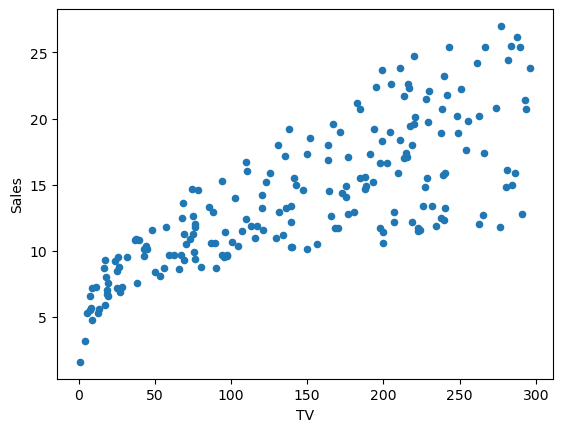

In [5]:
# Visualise the relationship between the features and the response using scatterplots
df.plot(x='TV',y='Sales',kind='scatter')

In [6]:
# data separation and preparation x='TV',y='Sales'
X = df['TV'].to_numpy()
print('x: ',X);

x:  [230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.

In [7]:
Y = df['Sales'].to_numpy()
print('y: ',Y);

y:  [22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6  8.6 17.4  9.2  9.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  12.5  5.6 15.5  9.7 12.  15.  15.9
 18.9 10.5 21.4 11.9  9.6 17.4  9.5 12.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 12.9  8.5 14.9 10.6 23.2 14.8  9.7 11.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 15.7 14.  18.   9.3  9.5 13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 12.3 11.3 13.6
 21.7 15.2 12.  16.  12.9 16.7 11.2  7.3 19.4 22.2 11.5 16.9 11.7 15.5
 25.4 17.2 11.7 23.8 14.8 14.7 20.7 19.2  7.2  8.7  5.3 19.8 13.4 21.8
 14.1 15.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  11.6 15.2 19.7 10.6
  6.6  8.8 24.7  9.7  1.6 12.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2
 17.1 15.   8.4 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2
  8.7 26.2 17.6 22.6 10.3 17.3 15.9  6.7 10.8  9.9  5.9 19.6 17.3  7.6
  9

In [37]:
# calling the model to learn
r = SimpleLinearRegression(X, Y)
print('a: ',r)

a:  [1.7886, 0.0832]


In [40]:
# calculation of y_predict
yhat = predictY(r,X)
print(yhat)

[20.93292  5.491    3.21964 14.3934  16.83116  2.51244  6.5726  11.78924
  2.50412 18.41196  7.28812 19.65164  3.76876  9.9006  18.76972 18.04588
  7.42956 25.20108  7.54604 14.04396 19.95948 21.54028  2.88684 20.78316
  6.97196 23.66188 13.67788 21.76492 22.48876  7.66252 26.15788 11.18188
  9.87564 23.88652  9.75084 25.97484 23.99468  8.00364  5.37452 20.7582
 18.6366  16.515   26.21612 19.00268  3.87692 16.35692  9.25164 21.74828
 20.69164  7.35468 18.41196 10.14188 19.79308 16.98092 23.64524 18.33708
  2.39596 13.12044 19.32716 19.31884  6.2398  23.52876 21.69836 10.33324
 12.69612  7.5294   4.4094  13.37836 21.54028 19.82636 18.35372 10.92396
  4.01836 12.55468 19.54348  3.19468  4.0766  11.8142   2.23788 11.4398
  8.14508 21.73996  8.05356  7.47948 19.5518  17.86284  8.13676 10.99884
  9.13516 10.92396 12.96236  4.16812 19.90124 22.66348 10.72428 15.37516
 18.22892 17.17228 25.89164 13.03724 20.29228 26.44908 25.10124 17.42188
 21.60684 13.26188  3.8686   9.30988  2.87852 23.0378

In [41]:
# calculating SSE error :
print('sse: ',sse(Y,yhat).round(2))

sse:  3968.14
